In [1]:
# Welcome to QRSim Tutorial! (This is still work in progress)
# You're welcome to send questions to pl152@duke.edu

from Circuit import Circuit
from numpy import *

# Construct circuit with 3 qubits (you'll see performance issues for large N!)
circ = Circuit(3);

# Superpose 1st qubit
circ.Y(0, pi/2)

# Apply CNOT to 1st and 2nd qubit
circ.Y(0, pi/2).XX(0,1, pi/2).X(0,-pi/2).X(1,-pi/2).Y(0, -pi/2)

# Compute and print final state
ideal_state = circ.compute()[0]
print(ideal_state)

[ 5.00000000e-01+5.00000000e-01j  0.00000000e+00+0.00000000e+00j
 -2.77555756e-17-2.77555756e-17j  0.00000000e+00+0.00000000e+00j
  1.11022302e-16-5.55111512e-17j  0.00000000e+00+0.00000000e+00j
  5.00000000e-01+5.00000000e-01j  0.00000000e+00+0.00000000e+00j]


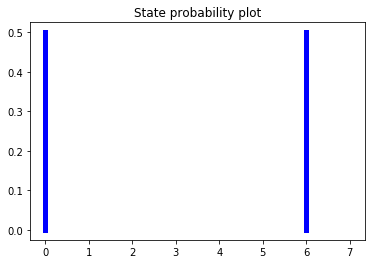

In [2]:
# Plot state probabilities
from Circuit_ops import state_prob_plot
state_prob_plot(ideal_state)

In [3]:
# Add errors to gates

# Generate noisy_gates
circ.compute()

# Output noisy native gates ([gate type, qubits involved, gate angle, gate axis])
circ.noisy_gates

[[['S_phi'],
  [0],
  [array([1.57079633, 1.57079633])],
  [array([1.57079633, 1.57079633])]],
 [['S_phi'],
  [0],
  [array([1.57079633, 1.57079633])],
  [array([1.57079633, 1.57079633])]],
 [['S_phi', 'S_phi'],
  [0, 1],
  [array([1.57079633, 1.57079633])],
  [array([0., 0.]), array([0., 0.])]],
 [['S_phi'], [0], [array([-1.57079633, -1.57079633])], [array([0., 0.])]],
 [['S_phi'], [1], [array([-1.57079633, -1.57079633])], [array([0., 0.])]],
 [['S_phi'],
  [0],
  [array([-1.57079633, -1.57079633])],
  [array([1.57079633, 1.57079633])]]]

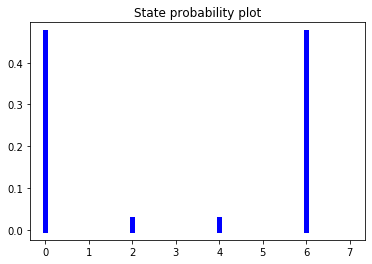

In [4]:
# Add 30% over-rotation error to 3rd gate (XX gate)
err = 0.3
for j in range(circ.runs):
    circ.noisy_gates[2][2][0][j] *= 1 + err 

# Recompute final state
final_state1 = circ.compute(compile_gates=False)[0]  
state_prob_plot(final_state1)

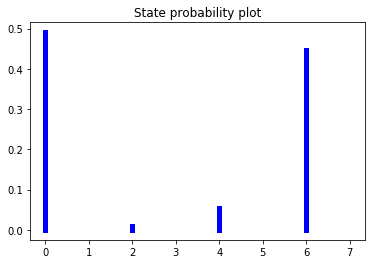

In [5]:
# Add phase error (-0.2 radians) to 4th gate
err = -0.2
for j in range(circ.runs):
    circ.noisy_gates[4][2][0][j] += err

# Recompute final state
final_state2 = circ.compute(compile_gates=False)[0]  
state_prob_plot(final_state2)


In [6]:
# Find fidelity
from Circuit_ops import find_fidelities

final_states = array([final_state1, final_state2])
find_fidelities(final_states, ideal_state)

array([0.94550326, 0.9360797 ])

In [7]:
# Good luck